<a href="https://colab.research.google.com/github/Almasyriqi/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul 3 PCVK**

Nama : M. Syifa'ul Ikrom Almasyriqi

Kelas : TI-3G

NIM : 1941720057

 > **Praktikum 1**

Melakukan transformasi linier brightness.

Formula: g(x,y)=f(x,y)+b

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import sys

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


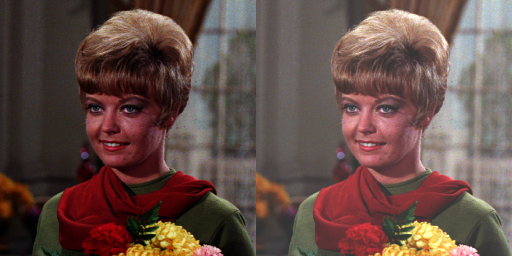

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**Tugas Praktikum**
1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan 
formula yang terdapat pada bagian Ulasan Teori.
2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory 
menggunakan formula yang terdapat pada bagian Ulasan Teori.
3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, 
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada 
bagian Ulasan Teori.
4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, 
tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna 
merah menjadi grayscale.

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


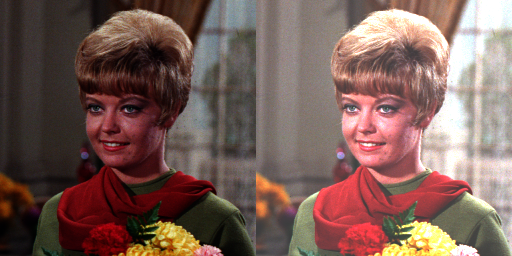

In [ ]:
# Tugas 1
# Transformasi contrast
# Formula : 𝑔(𝑥, 𝑦) = 𝑎 ∗ 𝑓(𝑥, 𝑦) + 𝑏 , dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah 
# nilai pixel asli, a adalah nilai contrast, dan b adalah nilai brightness.

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
  if(brightness > 255 or brightness < -255 or contrast < 1 or contrast > 3):
    sys.exit('range yang dimasukkan salah')
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 40


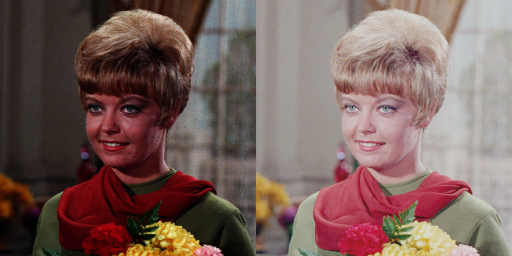

In [ ]:
# Tugas 2
# Transformasi Logarithmic brightness 
# Formula : 𝑠 = 𝑐 ∗ 𝑙𝑜𝑔(1 + 𝑟)

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
log_image = np.zeros(original.shape, original.dtype)

# Menggunakan formula transformasi logarithmic brightness
c = brightness
log_image = c * (np.log(original + 1))

# konversi tipe data float ke integer 
log_image = np.array(log_image, dtype = np.uint8)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

 Transformasi Grayscale 
----------------------------------------------
(512, 512, 3)


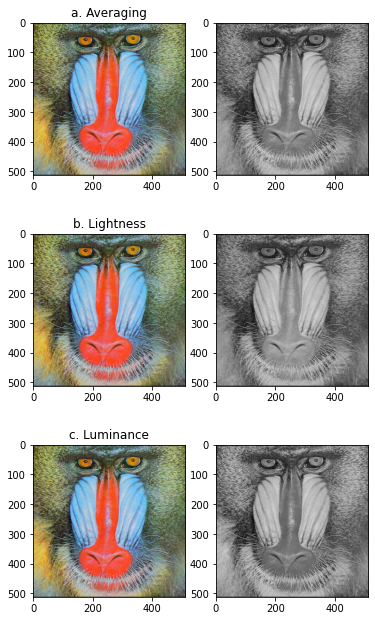

In [ ]:
# Tugas 3
# Transformasi Grayscale 
# Formula :
# a. 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒 𝑎𝑣𝑔 = (𝑅 + 𝐺 + 𝐵) / 3
# b. 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒 𝐿𝑖𝑔ℎ𝑡𝑛𝑒𝑠𝑠 = max[𝑅, 𝐺, 𝐵] + min[𝑅, 𝐺, 𝐵] / 2
# c. 𝐺𝑟𝑎𝑦𝑠𝑐𝑎𝑙𝑒 𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 = 0.21𝑅 + 0.72𝐺 + 0.07B

# Membuat figure
fig = plt.figure(figsize=(6, 11))
title = ["a. Averaging", "b. Lightness", "c. Luminance"]
  
# setting jumlah baris dan kolom
rows = 3
columns = 2

print(' Transformasi Grayscale ')
print('----------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
a_image = np.zeros(original.shape, original.dtype)
b_image = np.zeros(original.shape, original.dtype)
c_image = np.zeros(original.shape, original.dtype)
arr_image = [a_image, b_image, c_image]

# akses pixel 
for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    # Menggunakan metode grayscale averaging
    a_image[i,j,:] = int(original[i,j,0] / 3 + original[i,j,1] / 3 + original[i,j,2] / 3)

    # Menggunakan metode grayscale 𝐿𝑖𝑔ℎ𝑡𝑛𝑒𝑠𝑠
    b_image[i,j,:] = int((max(original[i,j,:]) / 2) + (min(original[i,j,:]) / 2))

    # Menggunakan metode grayscale 𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 
    c_image[i,j,:] = int((0.21 * original[i,j,0]) + (0.72 * original[i,j,1]) + (0.07 * original[i,j,2]))

# Adds a subplot 
indeks = 0
index = 0
for i in range(6):
  fig.add_subplot(rows, columns, i+1)
  if(i%2 == 0):
    plt.title(title[indeks])
    plt.imshow(original)
    indeks += 1
  else:
    plt.imshow(arr_image[index])
    index += 1

print(a_image.shape)

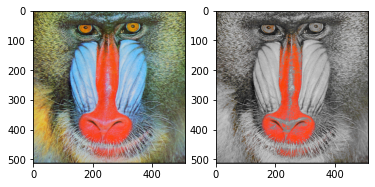

In [ ]:
# Tugas 4
# Menampilkan warna merah dan yang lain diubah menjadi warna grayscale

# Membuat figure
fig = plt.figure(figsize=(6, 11))
title = ["a. Averaging", "b. Lightness", "c. Luminance"]
  
# setting jumlah baris dan kolom
rows = 1
columns = 2

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
red_image = original.copy()
final_image = [original, red_image]

# akses pixel 
for i in range(original.shape[0]):
  for j in range(original.shape[1]):
    if(original[i,j,0] < 80 or original[i,j,1] > 100 or original[i,j,2] > 100):
      # Menggunakan metode grayscale 𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒
      red_image[i,j,:] = int((0.21 * original[i,j,0]) + (0.72 * original[i,j,1]) + (0.07 * original[i,j,2]))

for i in range(2):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(final_image[i])